In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("D:\Github\ML_Zoomcamp_2025\hw1_car_fuel_efficiency.csv")

In [3]:
df.head

<bound method NDFrame.head of       engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             17.7        2003  Eu

In [5]:
print(df.columns)

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')


In [8]:
df = df.drop(columns=['num_cylinders','acceleration', 
                'origin', 'fuel_type', 'drivetrain',
                'num_doors'])


In [9]:
print(df.columns)

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')


In [14]:
np.max(df.fuel_efficiency_mpg)

25.96722204888372

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

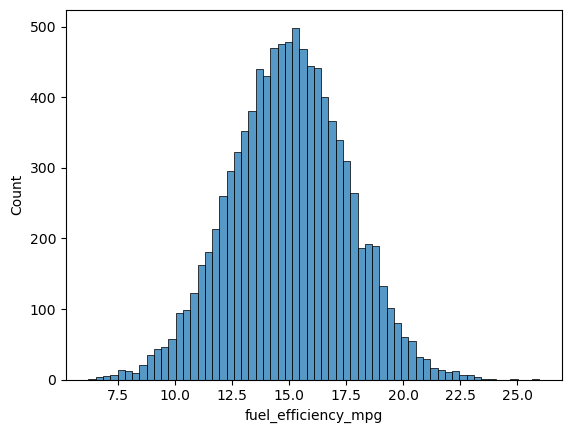

In [13]:
sns.histplot(df.iloc[:,4])

In [16]:
df.isnull().sum(axis=0)

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [18]:
df.median(axis=0)

engine_displacement     200.000000
horsepower              149.000000
vehicle_weight         2993.226296
model_year             2012.000000
fuel_efficiency_mpg      15.006037
dtype: float64

In [95]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [96]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [97]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]



In [98]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

In [99]:

def prepare_X_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [100]:

def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [101]:
X_train_zero = prepare_X_zero(df_train)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
print(w_0_zero,w_zero)
y_pred_zero = w_0_zero + X_train_zero.dot(w_zero)

28.82736547391715 [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]


In [102]:
X_train_mean = prepare_X_mean(df_train)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
print(w_0_mean,w_mean)
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)

28.92525995164767 [ 0.00012093  0.01030308 -0.00501009 -0.00023463]


In [103]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
    

In [104]:
print(rmse(y_train, y_pred_zero))
print(rmse(y_train, y_pred_mean))

0.5202614265099076
0.46244121379599645


In [105]:
X_val_zero = prepare_X_zero(df_val)
X_val_mean = prepare_X_mean(df_val)
y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)
y_pred_mean = w_0_mean + X_val_mean.dot(w_mean)
print(round(rmse(y_val, y_pred_zero),2))
print(round(rmse(y_val, y_pred_mean),2))

0.52
0.46


In [106]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [107]:
X_train = prepare_X_zero(df_train)
X_val = prepare_X_zero(df_val)

In [109]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    #print(rmse(y_val, y_pred))
    print(round(rmse(y_val, y_pred),2))

0.52
0.52
0.52
0.52
0.52
0.52
0.52


In [110]:
RMSEs = np.zeros(10)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X_zero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_zero(df_val)
    y_pred = w_0 + X_val.dot(w)
    RMSEs[seed] = rmse(y_val, y_pred)
    print(rmse(y_val, y_pred))

0.5206531296308569
0.5213388912864579
0.5228069974770838
0.5159516741085112
0.5109129460067932
0.528340646001329
0.5313910658171428
0.5090670387363528
0.5147399129521133
0.5131865908171102


In [111]:
RMSEs.std()

np.float64(0.006989446426375709)

In [112]:
X_train = prepare_X_zero(df_train)
X_val = prepare_X_zero(df_val)
w_0, w = train_linear_regression_reg(np.concatenate((X_train,X_val),axis=0), 
                                     np.concatenate((y_train,y_val),axis=0), r=0.001)
X_test = prepare_X_zero(df_test)
y_pred = w_0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.5156261299185867)